# Stochastic processes course 2018/2019-2 @ ELTE
# Assignment 4: Random-walk simulation with Monte Carlo method
## 03.11.2019

## Random-Walk on a 1D lattice with equilibrium:

Initially a particle rests on a 1D lattice with lattice constant $a$ in one of its grid points. It is also attached with a rubber rope with $D$ spring constant to the origin. In every step, the particle moves in the positive, or negative direction, always jumping between discrete, adjacent lattice points. This means that at each step it will jump to one of the grid points adjacent to its current position.   
In every step, we calculate the difference of the potential energy between the origin and the end point of a single jump. If $\Delta E < 0$, then we execute the step in the simulation. If $\Delta E > 0$, we choose a random value $X$, where $X \in \left[ 0; 1 \right]$. If $X < e^{- \beta \Delta E}$ we also execute the step, else we do nothing, and continue with the next step in the simulation.
    
Characteristic parameters of the system:

$$
\beta D a^{2} = \frac{D a^{2}}{k_{B} T} = \left\{ 0.06,\ 0.24,\ 0.52,\ 1.35 \right\}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import random
import seaborn as sns

sns.set_style(style='whitegrid')

## Characteristic parameters of the system

In [408]:
# Boltzmann constant
k_B = 1.380648 * 10**(-23)

# Spring constant of the rubber band, fixing the moving particle
D = 1e-03

# Lattice constant
# Distance between discrete points in the 1D lattice
# a = 5 * 1e-10 approximatly corresponds to real materials
a = 5 * 1e-10

beta_1 = 0.06 / (D * a**2)
print('At first case T = {0} K'.format(1 / (beta_1 * k_B)))
beta_2 = 0.24 / (D * a**2)
print('At second case T = {0} K'.format(1 / (beta_2 * k_B)))
beta_3 = 0.52 / (D * a**2)
print('At third case T = {0} K'.format(1 / (beta_3 * k_B)))
beta_4 = 1.35 / (D * a**2)
print('At fourth case T = {0} K'.format(1 / (beta_4 * k_B)))

At first case T = 301.7906567544129 K
At second case T = 75.44766418860323 K
At third case T = 34.821998856278405 K
At fourth case T = 13.412918077973904 K


## 1.: Choose direction for the 1D random-walk on the X-axis

In [238]:
def choose_sign():
    return -1 if random.random() < 0.5 else 1

### Testing sign choosing function
### Means of random +1 and -1 values have an expected value of 0

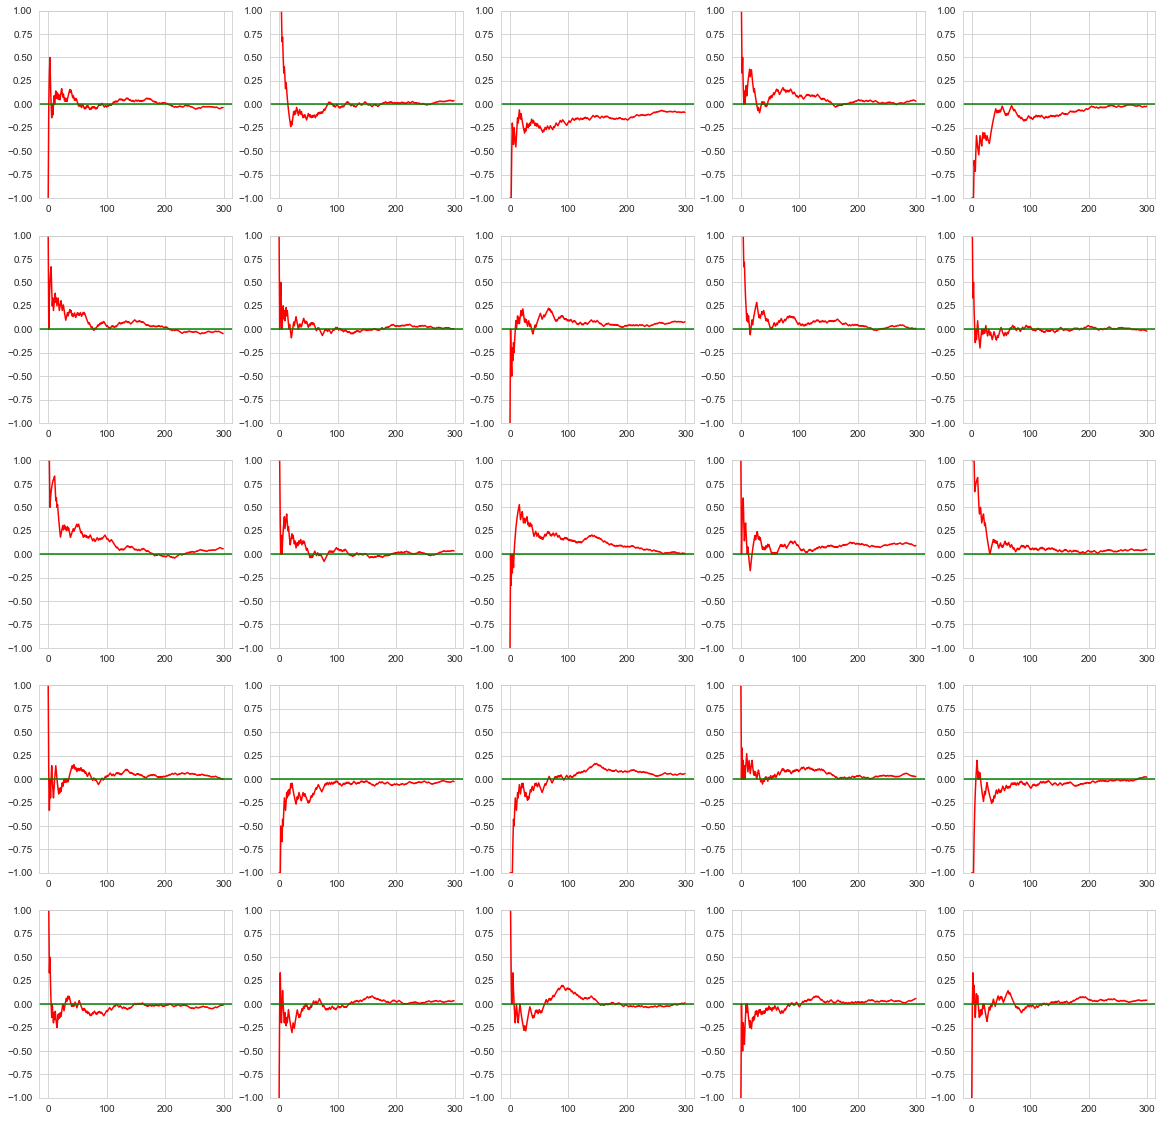

In [239]:
nrows = 5
ncols = 5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20))

n = 300

for k in range(0,nrows):
    for j in range(0,ncols):
        indeces = [i for i in range(0,n)]
        randoms = [choose_sign() for i in range(0,n)]
        means = [np.mean(randoms[:(i+1)]) for i in range(0,n)]

        axes[j][k].plot(indeces, means, c='red')
        
        axes[j][k].set_ylim(-1,1)
        
        axes[j][k].axhline(y=0, color='green')

plt.show()

## 2.: $\Delta E$ of the current step

In [320]:
def E(energy_level, a, D):
    return 1/2 * D * a**2 * energy_level**2

## 3.: Step with the simulation

In [322]:
def simulation_step(beta, start, steps):

    # Chronologies for reached energy levels' indeces and actual energies in order
    energy_levels_chronology = np.zeros((steps+1), dtype='int')
    energy_chronology = np.zeros((steps+1))
    # Starting position on X axis
    energy_levels_chronology[0] = start
    energy_chronology[0] = E(energy_level = energy_levels_chronology[0],
                             a = a,
                             D = D)

    for current_step in range(0,steps):
        # Choose a direction for the 1D random-walk on the X-axis
        # +1 return value indicates stepping in the positive (right) direction
        # -1 return value indicates steping in the negative (left) direction
        direction = choose_sign()

        # Calculate energy difference between the jump's origin and end points
        E_1 = E(energy_level = energy_levels_chronology[current_step],
                a = a,
                D = D)

        E_2 = E(energy_level = energy_levels_chronology[current_step] + direction * 1,
                a = a,
                D = D)
        
        delta_E = E_2 - E_1

        # Update chronology of reached energy levels' indeces
        if(delta_E <= 0):
            energy_levels_chronology[current_step+1] = energy_levels_chronology[current_step] + direction * 1

        else:
            if(random.random() < np.exp(- beta * delta_E)):
                energy_levels_chronology[current_step+1] = energy_levels_chronology[current_step] + direction * 1
            else:
                energy_levels_chronology[current_step+1] = energy_levels_chronology[current_step]

        # Update chronology of actual reached energy levels
        energy_chronology[current_step+1] = E(energy_level = energy_levels_chronology[current_step+1],
                                              a = a,
                                              D = D)
                
    return energy_levels_chronology, energy_chronology

## Run functions with arbitrary initial conditons

In [406]:
steps = 3000
start = -80

betas = {'1': beta_1,
         '2': beta_2,
         '3': beta_3,
         '4': beta_4
        }

# Dicts for storing the energy levels' indeces and actual energies for various betas
energy_levels_chronology = {}
energy_chronology = {}

# Run the simulation
for i in range(1,len(betas)+1):
    energy_levels_chronology[str(i)], energy_chronology[str(i)] = simulation_step(beta=betas[str(i)],
                                                                                  start=start,
                                                                                  steps=steps)

step_indeces = np.asarray([i for i in range(0,steps+1)])

## Plotting propagation of the particle throughout energy levels

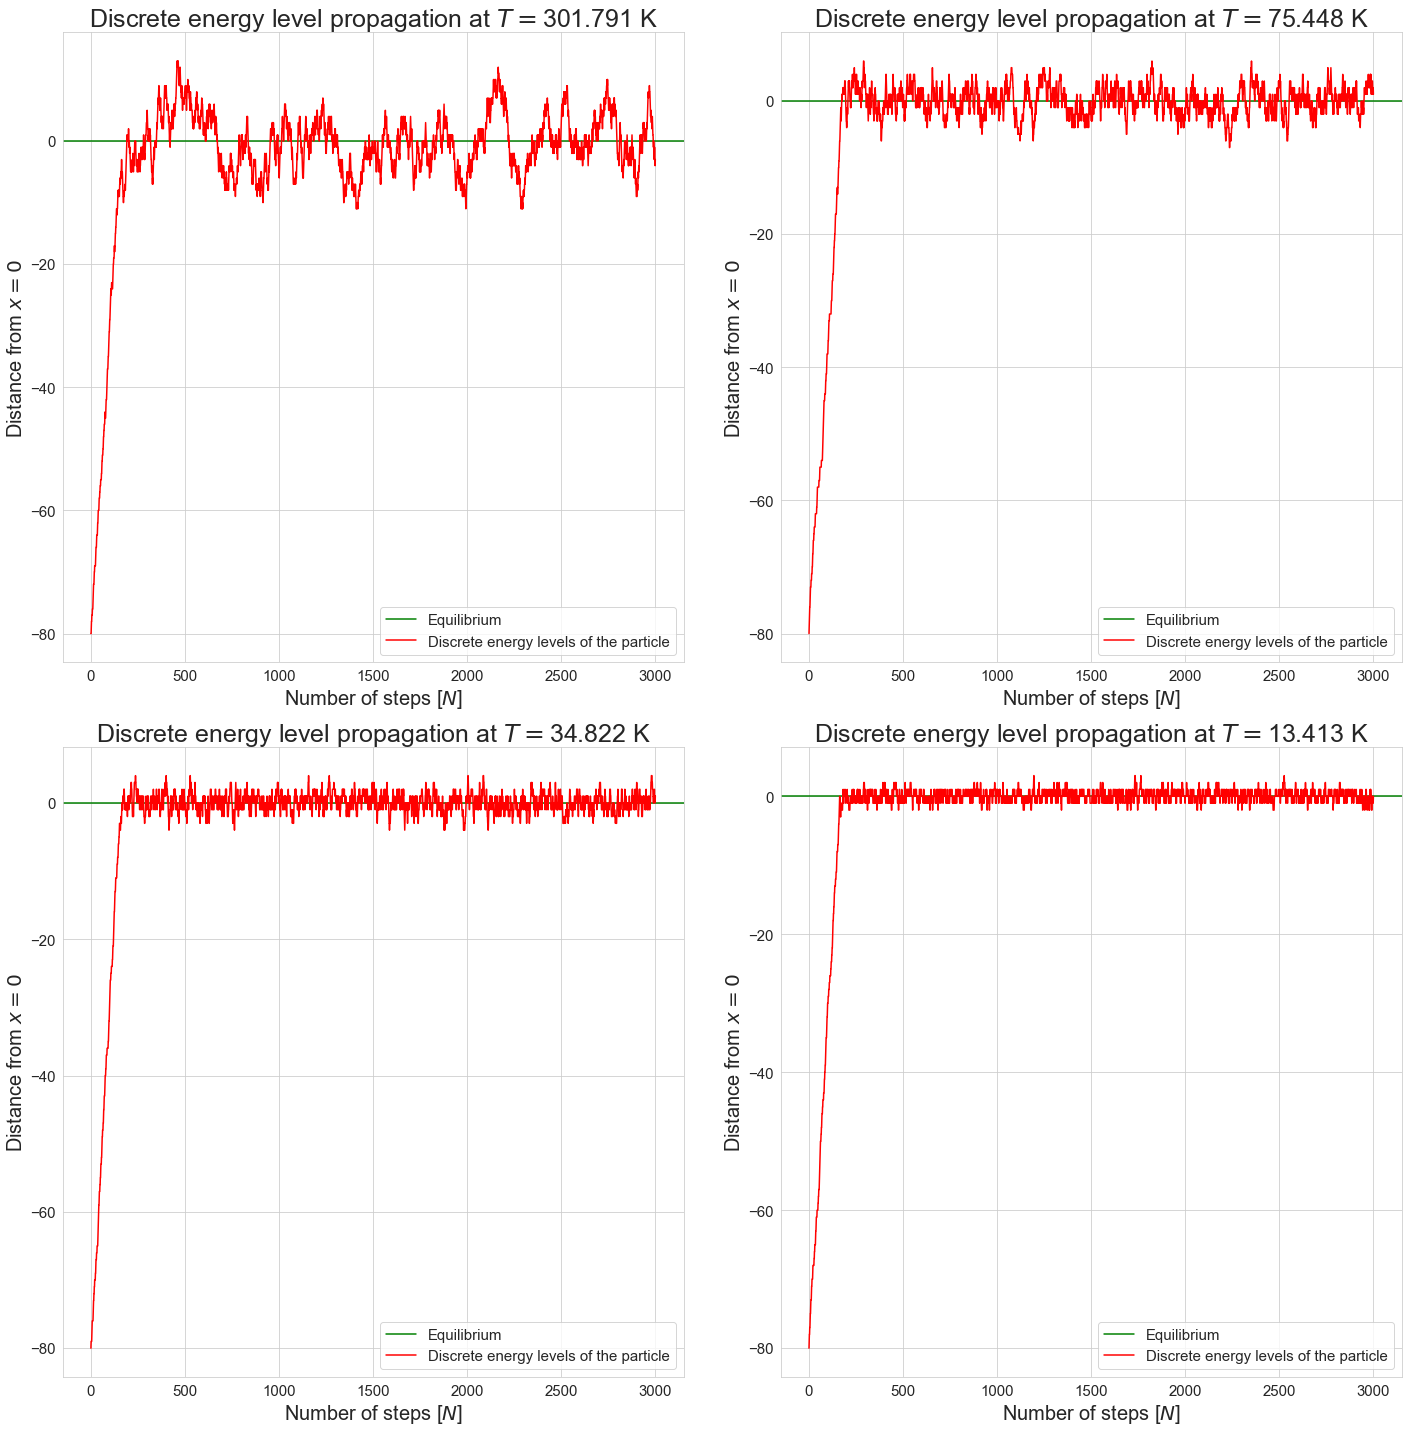

In [409]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20))

for i in range(0,nrows):
    for j in range(0,ncols):
        
        axes[i][j].axhline(y=0, color='green', label='Equilibrium')
        axes[i][j].plot(step_indeces, energy_levels_chronology[str(i*nrows + j + 1)], c='red', label='Discrete energy levels of the particle')

        axes[i][j].set_title('Discrete energy level propagation at $T =${0:.3f} K'.format(1 / (betas[str(i*nrows + j + 1)] * k_B)), fontsize=50/ncols)

        axes[i][j].set_xlabel('Number of steps [$N$]', fontsize=40/ncols)
        axes[i][j].set_ylabel('Distance from $x = 0$', fontsize=40/ncols)

        axes[i][j].tick_params(axis='both', which='major', labelsize=30/ncols)

        axes[i][j].legend(fontsize=30/ncols)

fig.tight_layout()
plt.show()

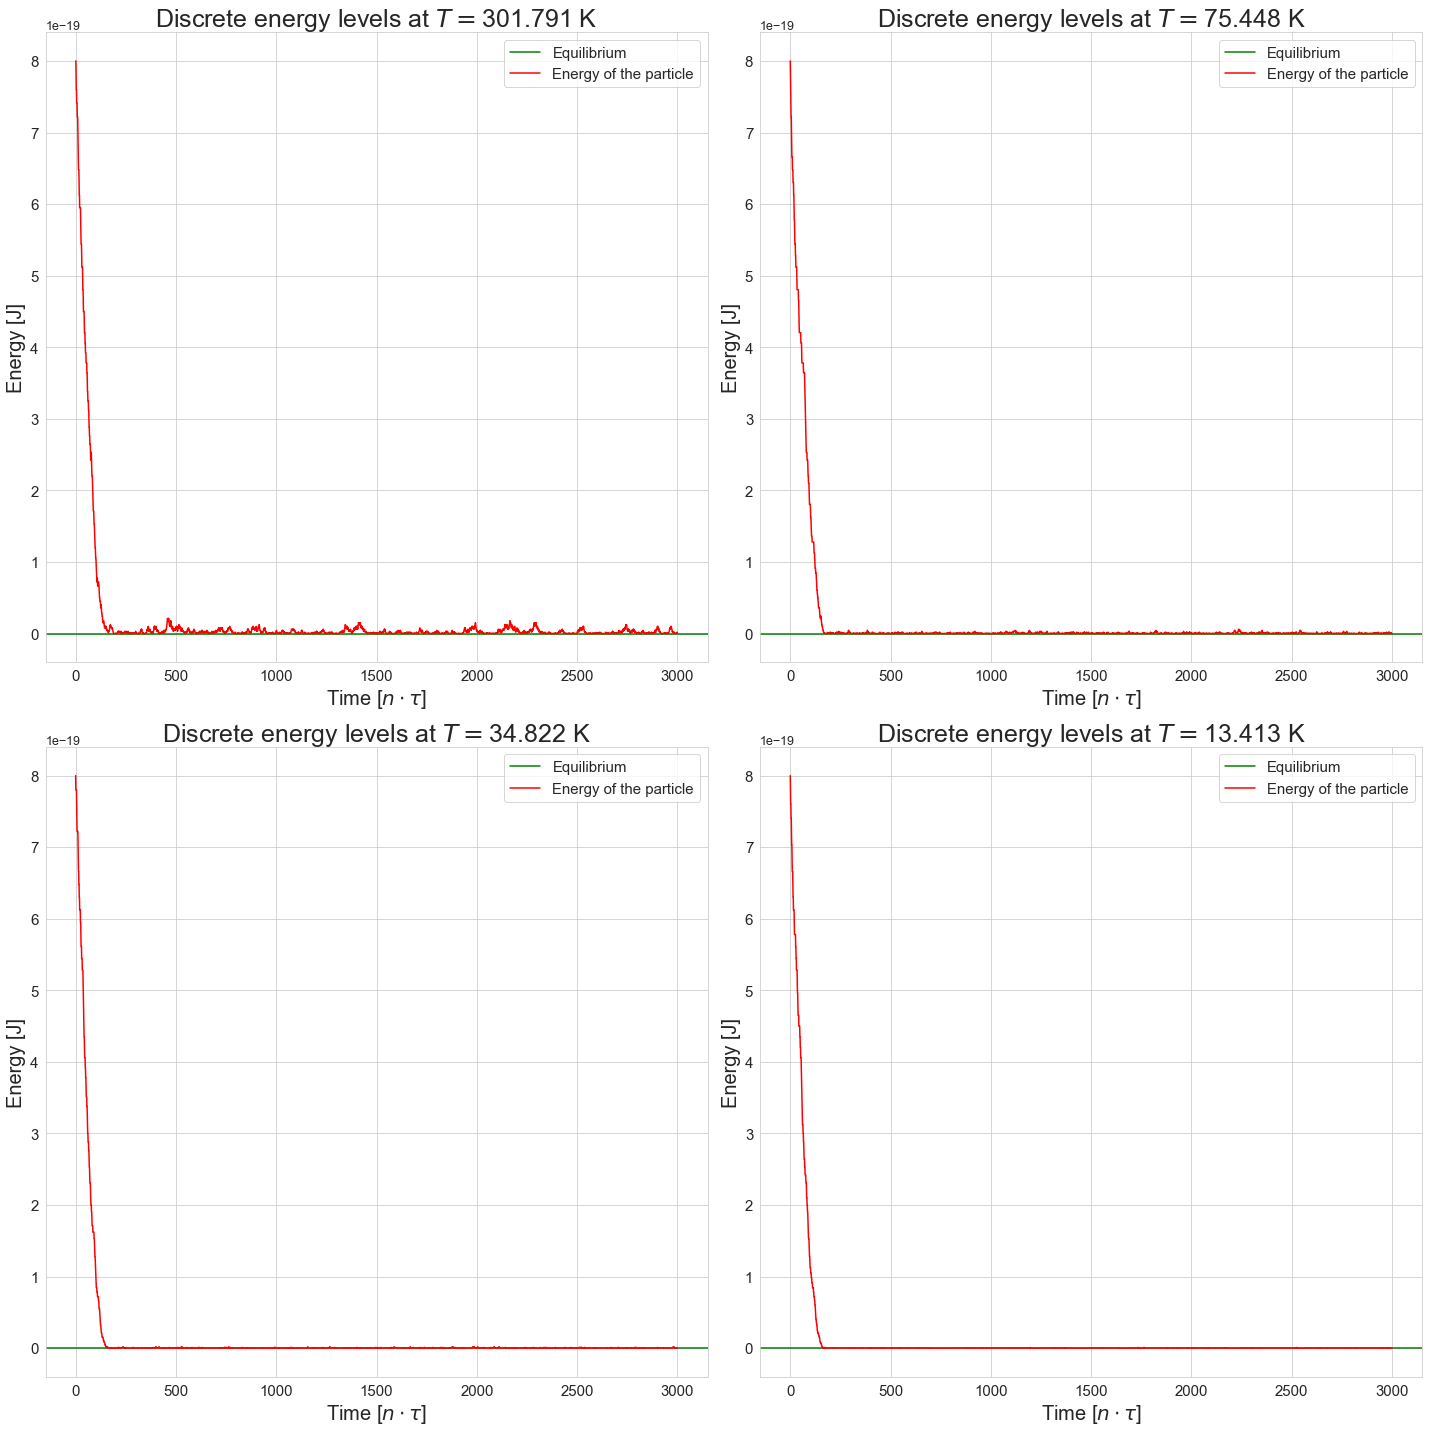

In [410]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20))

for i in range(0,nrows):
    for j in range(0,ncols):

        axes[i][j].axhline(y=0, color='green', label='Equilibrium')
        axes[i][j].plot(step_indeces, energy_chronology[str(i*nrows + j + 1)], c='red', label='Energy of the particle')

        axes[i][j].set_title('Discrete energy levels at $T =${0:.3f} K'.format(1 / (betas[str(i*nrows + j + 1)] * k_B)), fontsize=50/ncols)

        axes[i][j].set_xlabel('Time [$n \\cdot \\tau$]', fontsize=40/ncols)
        axes[i][j].set_ylabel('Energy [J]', fontsize=40/ncols)

        axes[i][j].tick_params(axis='both', which='major', labelsize=30/ncols)
        axes[i][j].yaxis.get_offset_text().set_fontsize(25/ncols)

        axes[i][j].legend(fontsize=30/ncols)
fig.tight_layout()
plt.show()

## Test various initial conditions one choosen $T$ temperature

### The choosen $T$ will be here $T = \frac{1}{\beta_{1} k_{B}} = 301.791\ \text{K}$

In [411]:
steps = 3000
choosen_beta = beta_1

# Dicts for storing the energy levels' indeces and actual energies for various betas
energy_levels_chronology_fixedT = {}
energy_chronology_fixedT = {}

# Run the simulation
for i in range(0,25):
    start = -250 + i * 20
    energy_levels_chronology_fixedT[str(i+1)], energy_chronology_fixedT[str(i+1)] = simulation_step(beta=choosen_beta,
                                                                                                    start=start,
                                                                                                    steps=steps)

step_indeces = np.asarray([i for i in range(0,steps+1)])

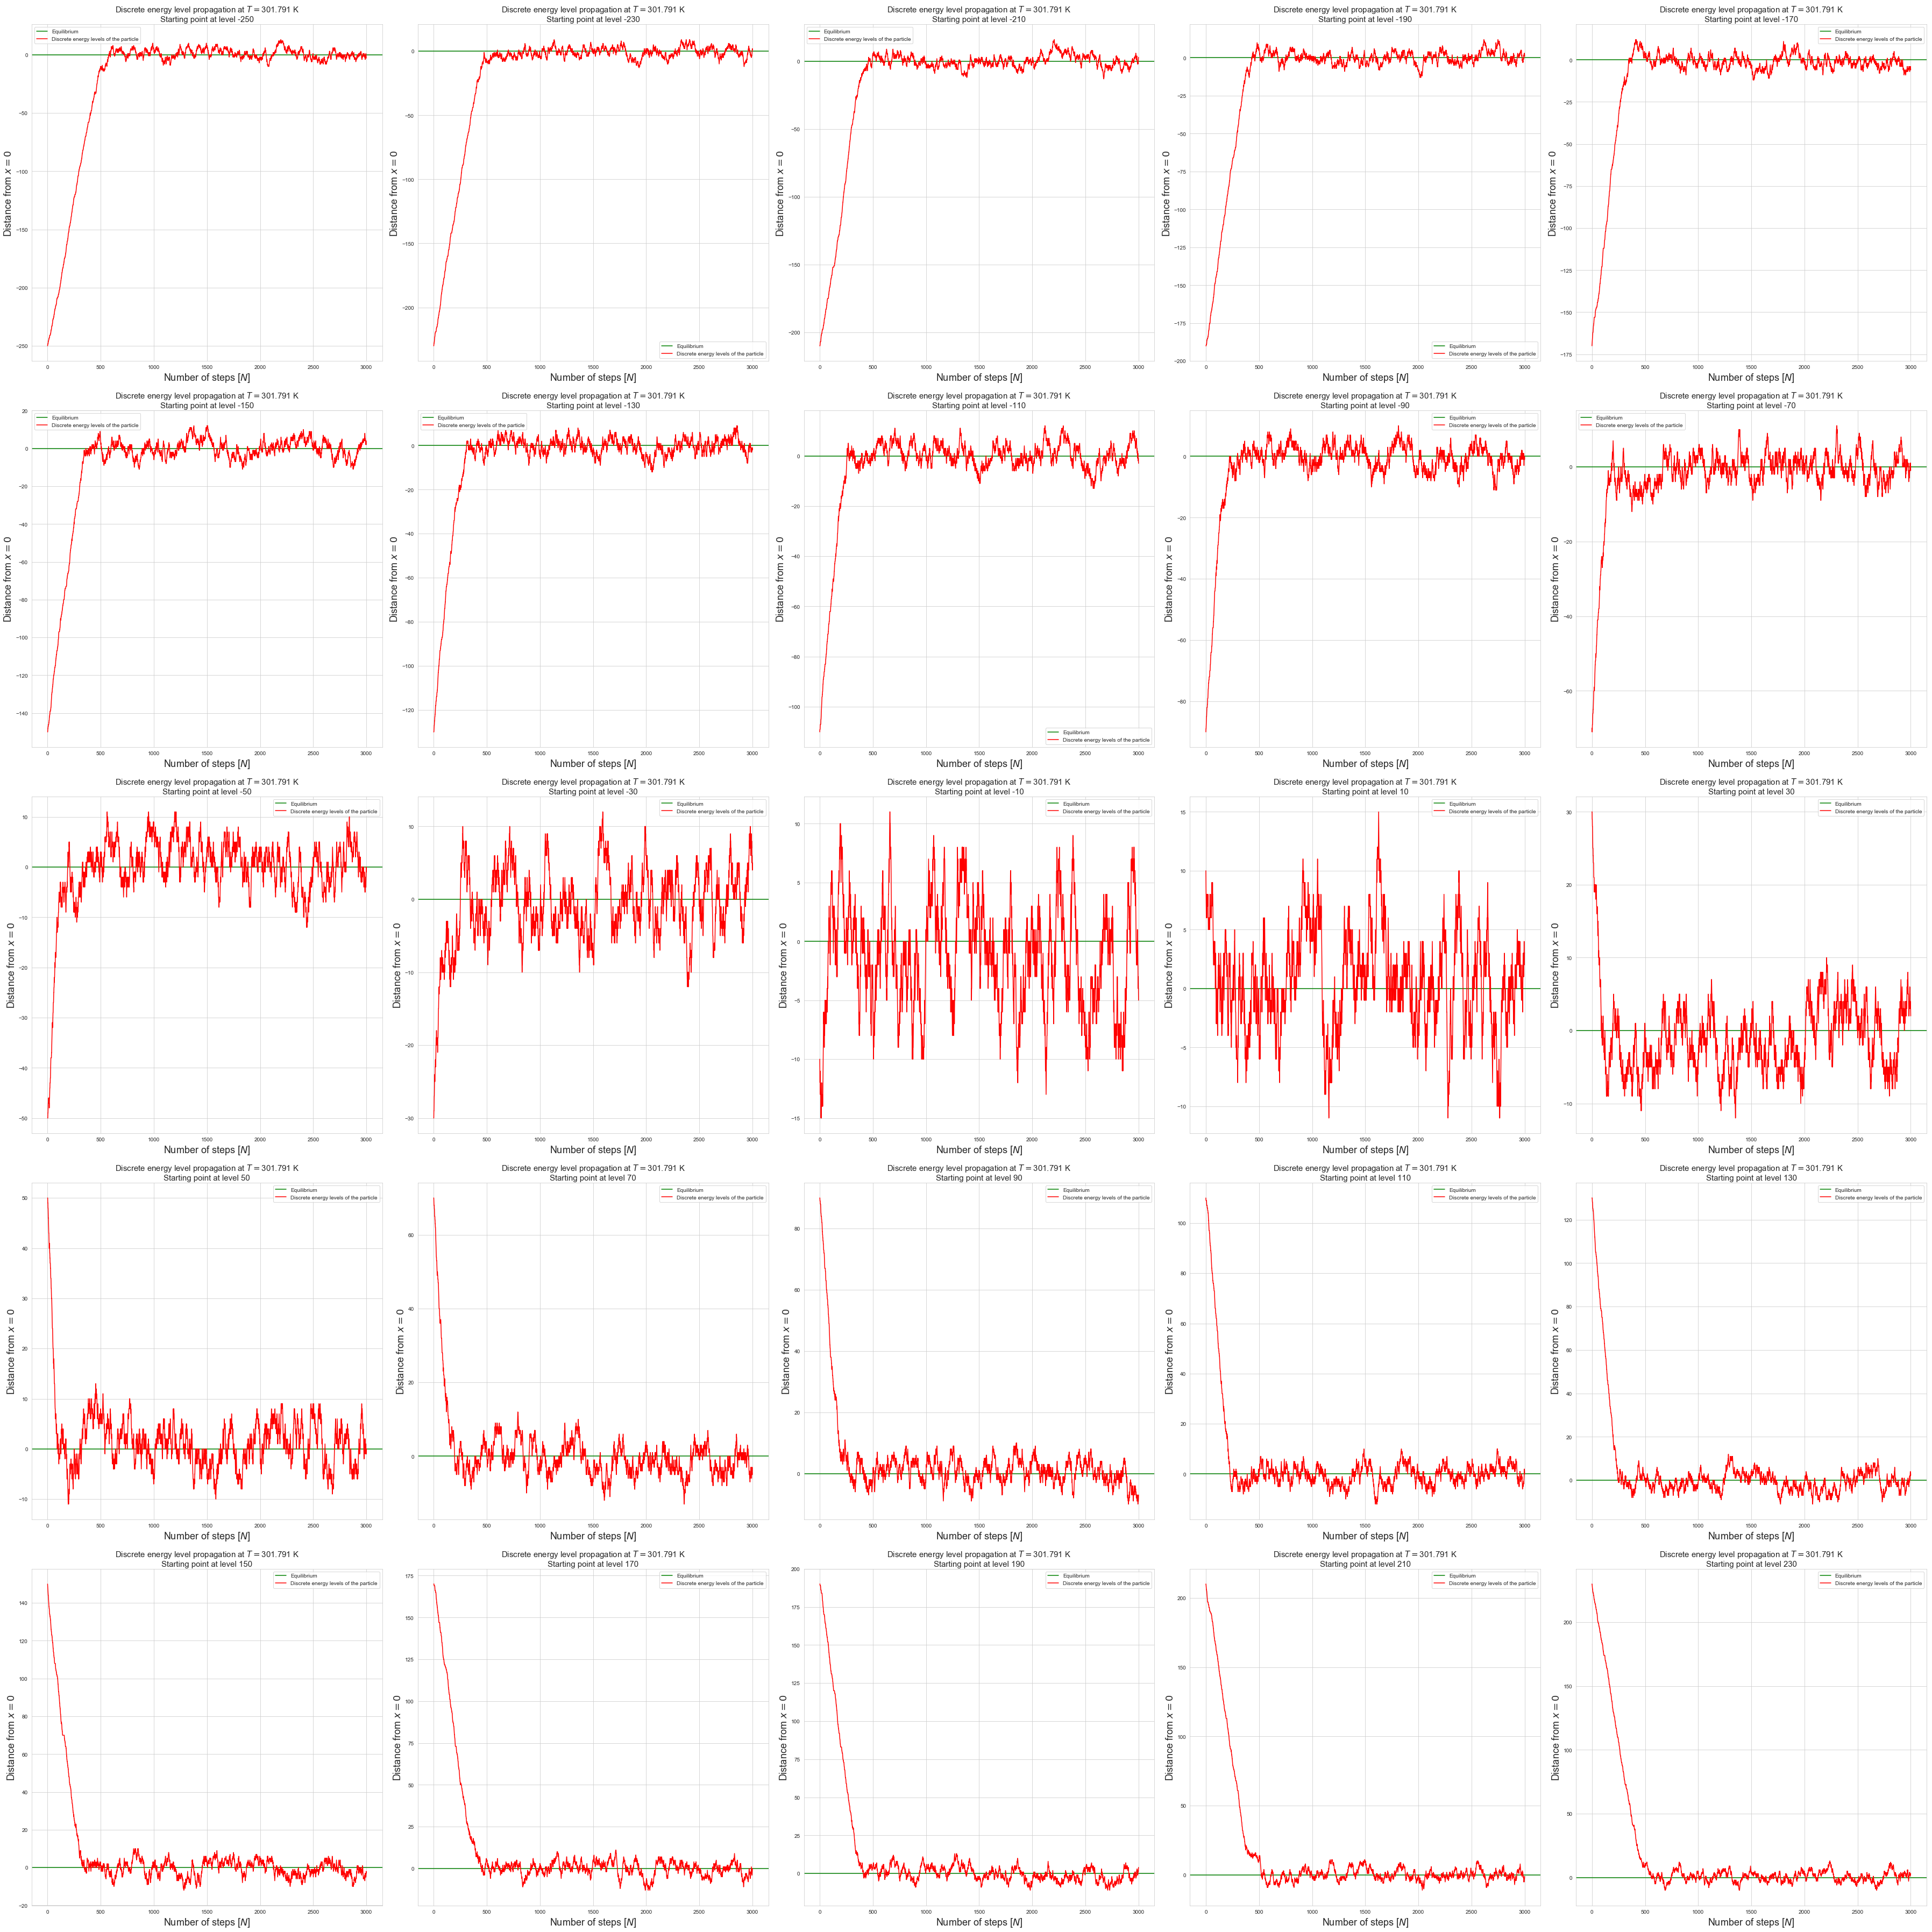

In [421]:
nrows = 5
ncols = 5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(50,50))

for i in range(0,nrows):
    for j in range(0,ncols):
        
        axes[i][j].axhline(y=0, color='green', label='Equilibrium')
        axes[i][j].plot(step_indeces, energy_levels_chronology_fixedT[str(i*nrows + j + 1)], c='red', label='Discrete energy levels of the particle')

        axes[i][j].set_title('Discrete energy level propagation at $T =${0:.3f} K\nStarting point at level {1}'.format(1 / (choosen_beta * k_B),
                                                                                                                       -250 + (i*nrows + j) * 20),
                             fontsize=15)

        axes[i][j].set_xlabel('Number of steps [$N$]', fontsize=18)
        axes[i][j].set_ylabel('Distance from $x = 0$', fontsize=18)

        axes[i][j].tick_params(axis='both', which='major', labelsize=10)

        axes[i][j].legend(fontsize=10)

fig.tight_layout()
plt.show()

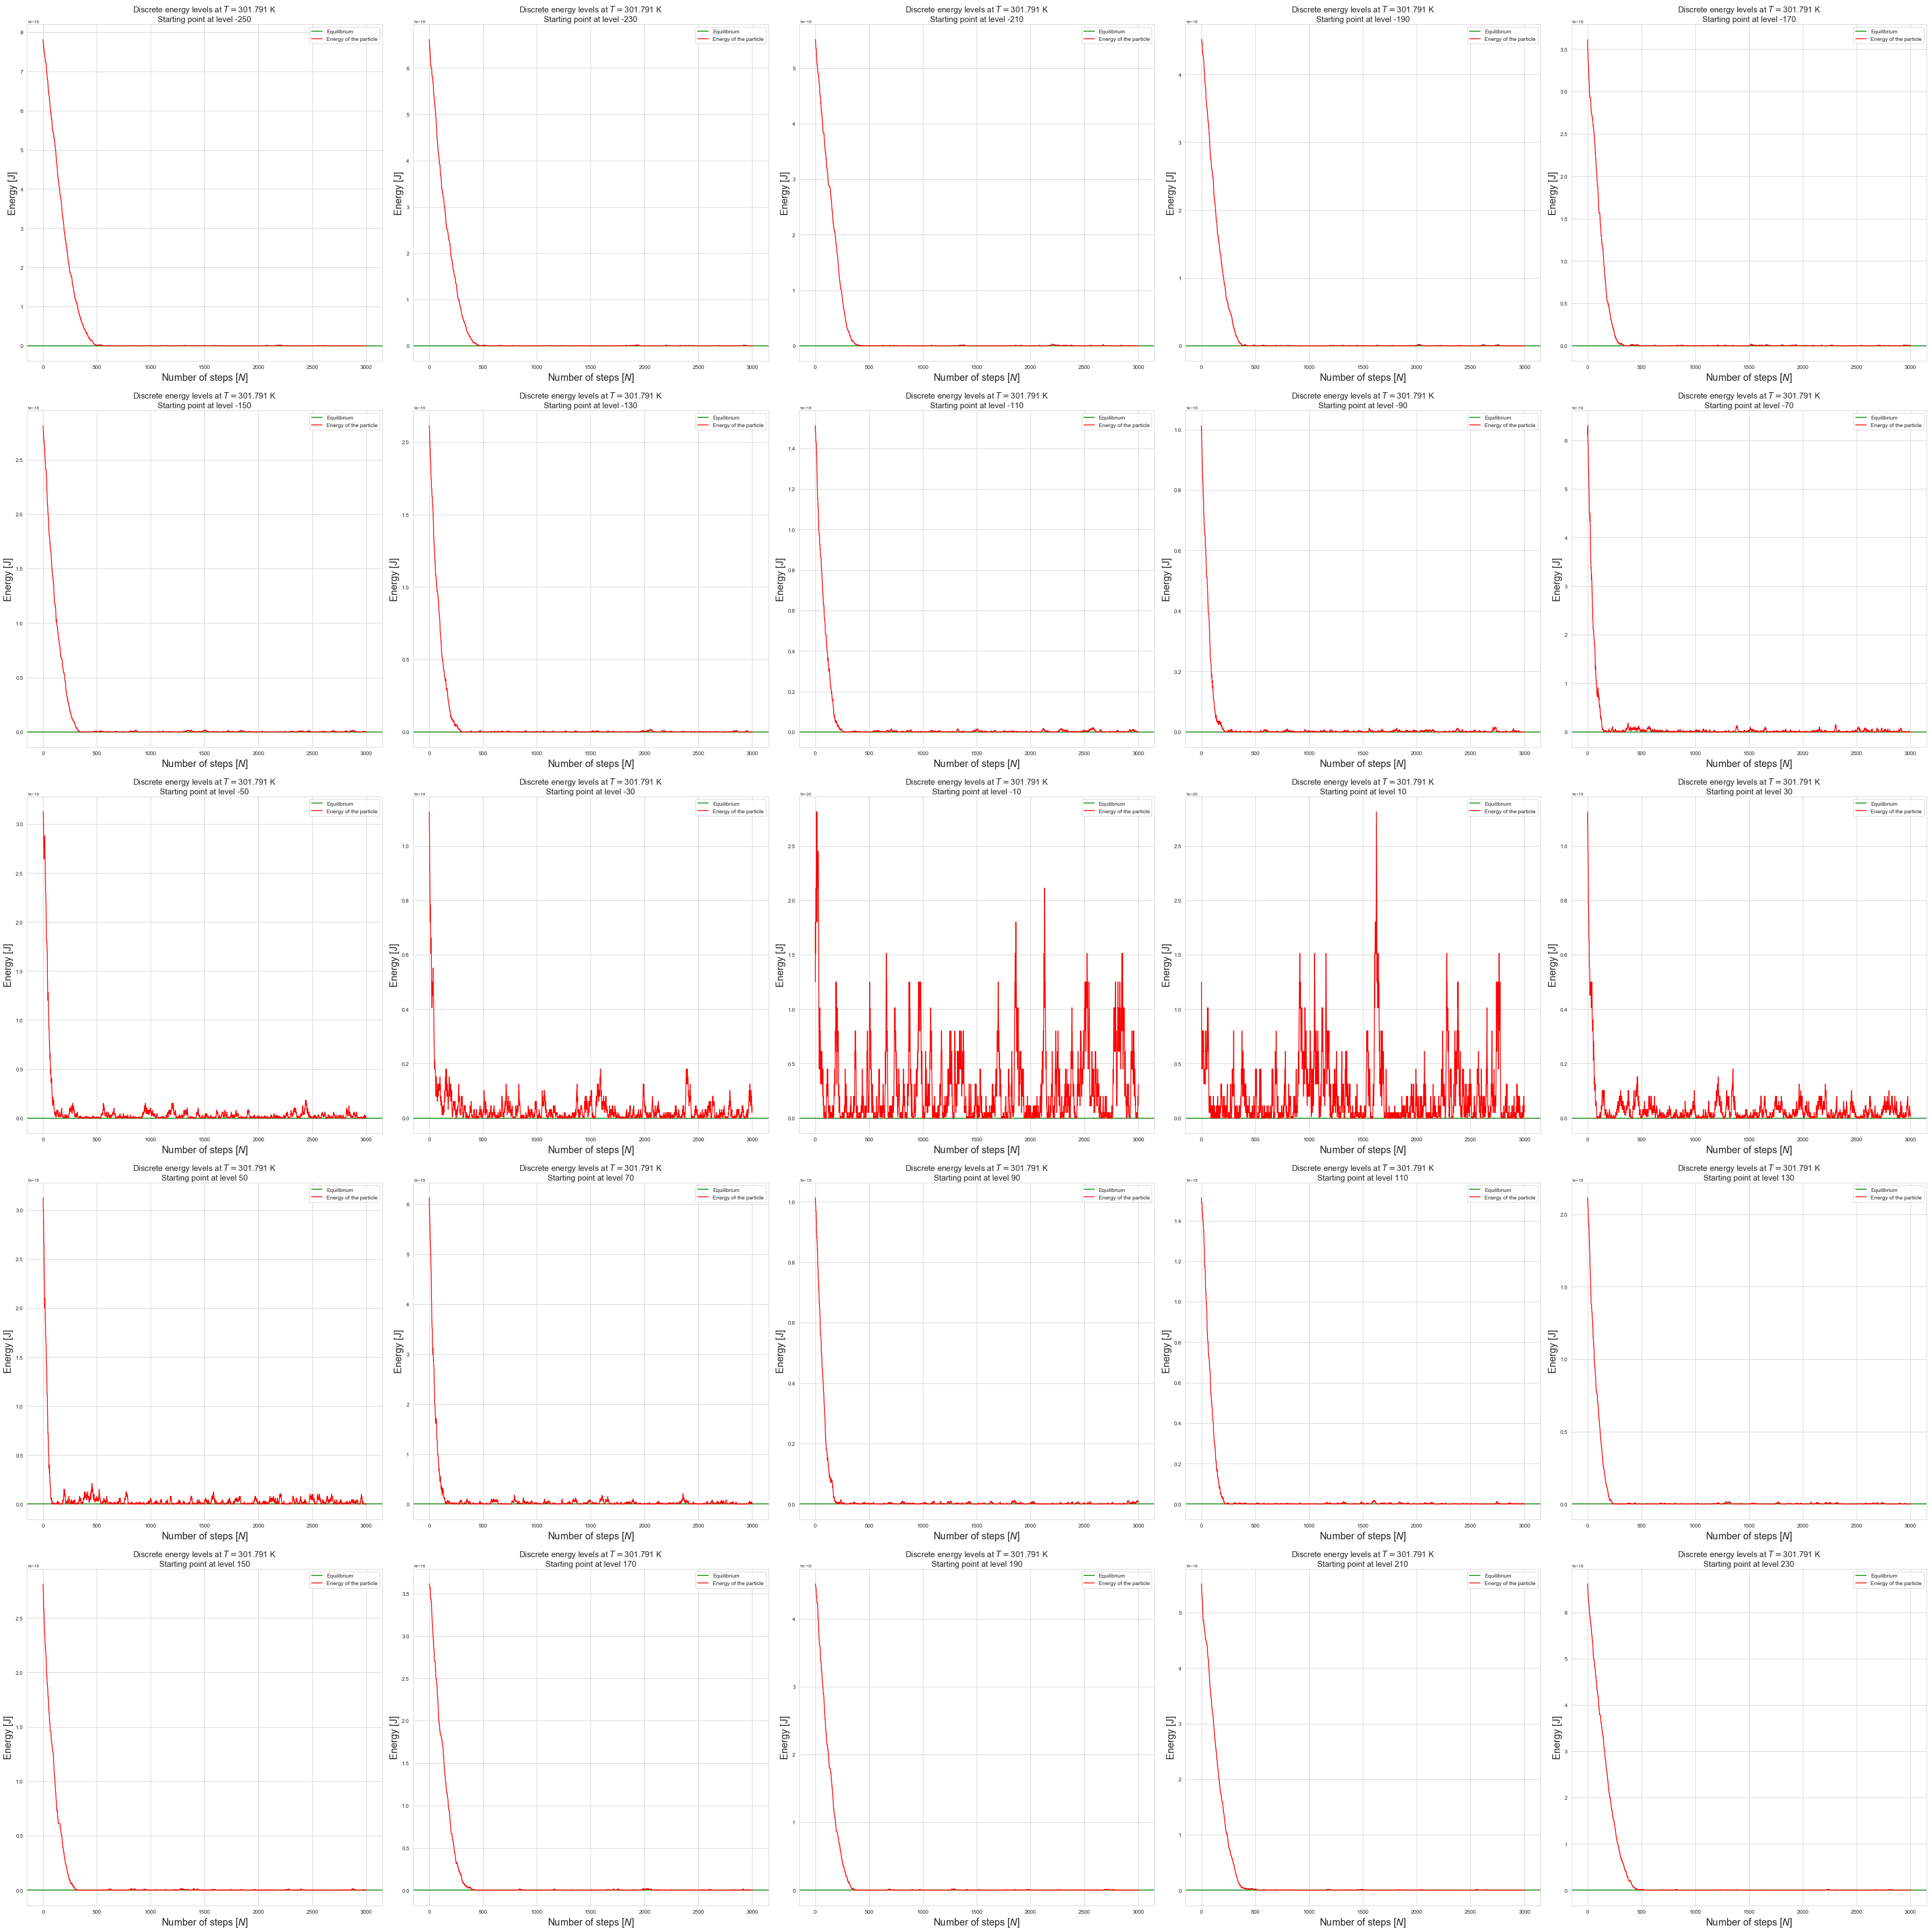

In [423]:
nrows = 5
ncols = 5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(50,50))

for i in range(0,nrows):
    for j in range(0,ncols):
        
        axes[i][j].axhline(y=0, color='green', label='Equilibrium')
        axes[i][j].plot(step_indeces, energy_chronology_fixedT[str(i*nrows + j + 1)], c='red', label='Energy of the particle')

        axes[i][j].set_title('Discrete energy levels at $T =${0:.3f} K\nStarting point at level {1}'.format(1 / (choosen_beta * k_B),
                                                                                                                       -250 + (i*nrows + j) * 20),
                             fontsize=15)

        axes[i][j].set_xlabel('Number of steps [$N$]', fontsize=18)
        axes[i][j].set_ylabel('Energy [J]', fontsize=18)

        axes[i][j].tick_params(axis='both', which='major', labelsize=10)
        axes[i][j].yaxis.get_offset_text().set_fontsize(8)

        axes[i][j].legend(fontsize=10)

fig.tight_layout()
plt.show()